## 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path= r'C:\Users\Bilel\Desktop\data_analyst_Carrer Foundry\Data Immersion\A6-Advanced Analytics & Dashboard Design\20-01-24 NY Citi Bike project'


In [3]:
# import  datset
df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citi_clusters.csv'),index_col = False)

## 2. Preparing Times-series dataset

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,...,trip_duration,subscriber,birth_year,gender,trip_duration_minutes,age,Trip Range,age_category,clusters,cluster
0,0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,...,993,Subscriber,1968,Female,16,45,long trip,Middle Age,2,purple
1,1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,...,581,Subscriber,1983,Male,9,30,average trip,Adult,0,pink
2,2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,...,361,Subscriber,1989,Male,6,24,average trip,Young Adult,0,pink
3,3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,...,561,Subscriber,1988,Female,9,25,average trip,Young Adult,3,dark purple
4,4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,...,2296,Non-Subscriber,1978,unknown,38,35,long trip,Adult,1,magenta


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trip_id', 'bike_id', 'day_of_week',
       'start_hour', 'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'trip_duration_minutes', 'age', 'Trip Range', 'age_category',
       'clusters', 'cluster'],
      dtype='object')

In [6]:
# Convert 'start_time' to datetime 
df['start_time'] = pd.to_datetime(df['start_time'])

# Separate 'start_time' into 'start_date' and 'start_hour' columns
df['start_date'] = df['start_time'].dt.date
df['start_hour'] = df['start_time'].dt.hour

# Display the updated DataFrame
print(df[['start_time', 'start_date', 'start_hour']])

               start_time  start_date  start_hour
0     2013-09-09 18:18:55  2013-09-09          18
1     2013-09-12 18:38:53  2013-09-12          18
2     2013-09-18 19:44:04  2013-09-18          19
3     2013-09-28 11:54:37  2013-09-28          11
4     2013-09-07 18:08:22  2013-09-07          18
...                   ...         ...         ...
49972 2013-09-21 18:39:20  2013-09-21          18
49973 2013-09-14 17:32:26  2013-09-14          17
49974 2013-09-07 18:08:21  2013-09-07          18
49975 2013-09-07 13:25:35  2013-09-07          13
49976 2013-09-23 21:54:36  2013-09-23          21

[49977 rows x 3 columns]


In [7]:
# Convert 'end_time' to datetime 
df['end_time'] = pd.to_datetime(df['end_time'])

# Separate 'start_time' into 'start_date' and 'start_hour' columns
df['end_date'] = df['end_time'].dt.date
df['end_hour'] = df['end_time'].dt.hour

# Display the updated DataFrame
print(df[['end_time', 'end_date', 'end_hour']])

                 end_time    end_date  end_hour
0     2013-09-09 18:35:28  2013-09-09        18
1     2013-09-12 18:48:34  2013-09-12        18
2     2013-09-18 19:50:05  2013-09-18        19
3     2013-09-28 12:03:58  2013-09-28        12
4     2013-09-07 18:46:38  2013-09-07        18
...                   ...         ...       ...
49972 2013-09-21 20:08:59  2013-09-21        20
49973 2013-09-14 17:52:17  2013-09-14        17
49974 2013-09-07 18:25:51  2013-09-07        18
49975 2013-09-07 14:14:04  2013-09-07        14
49976 2013-09-23 22:00:46  2013-09-23        22

[49977 rows x 3 columns]


In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,bike_id,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,...,gender,trip_duration_minutes,age,Trip Range,age_category,clusters,cluster,start_date,end_date,end_hour
0,0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,...,Female,16,45,long trip,Middle Age,2,purple,2013-09-09,2013-09-09,18
1,1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,...,Male,9,30,average trip,Adult,0,pink,2013-09-12,2013-09-12,18
2,2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,...,Male,6,24,average trip,Young Adult,0,pink,2013-09-18,2013-09-18,19
3,3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,...,Female,9,25,average trip,Young Adult,3,dark purple,2013-09-28,2013-09-28,12
4,4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,...,unknown,38,35,long trip,Adult,1,magenta,2013-09-07,2013-09-07,18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             49977 non-null  int64         
 1   Unnamed: 0               49977 non-null  int64         
 2   trip_id                  49977 non-null  object        
 3   bike_id                  49977 non-null  int64         
 4   day_of_week              49977 non-null  object        
 5   start_hour               49977 non-null  int32         
 6   start_time               49977 non-null  datetime64[ns]
 7   start_station_id         49977 non-null  int64         
 8   start_station_name       49977 non-null  object        
 9   start_station_latitude   49977 non-null  float64       
 10  start_station_longitude  49977 non-null  float64       
 11  end_time                 49977 non-null  datetime64[ns]
 12  end_station_id           49977 n

## 3.  Subsetting, wrangling, and cleaning time-series data

In [10]:
# chaging data type to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.1             49977 non-null  int64         
 1   Unnamed: 0               49977 non-null  int64         
 2   trip_id                  49977 non-null  object        
 3   bike_id                  49977 non-null  int64         
 4   day_of_week              49977 non-null  object        
 5   start_hour               49977 non-null  int32         
 6   start_time               49977 non-null  datetime64[ns]
 7   start_station_id         49977 non-null  int64         
 8   start_station_name       49977 non-null  object        
 9   start_station_latitude   49977 non-null  float64       
 10  start_station_longitude  49977 non-null  float64       
 11  end_time                 49977 non-null  datetime64[ns]
 12  end_station_id           49977 n

In [12]:
#ride counts by day
day_counts = df.groupby( df['start_date'].dt.date)['start_date'].count()


In [13]:
day_counts

start_date
2013-09-01    1190
2013-09-02    1041
2013-09-03    1538
2013-09-04    1769
2013-09-05    1621
2013-09-06    1721
2013-09-07    1607
2013-09-08    1575
2013-09-09    1665
2013-09-10    1808
2013-09-11    1770
2013-09-12    1525
2013-09-13    1836
2013-09-14    1567
2013-09-15    1610
2013-09-16    1473
2013-09-17    1838
2013-09-18    1841
2013-09-19    1810
2013-09-20    1999
2013-09-21    1599
2013-09-22    1429
2013-09-23    1719
2013-09-24    1878
2013-09-25    1844
2013-09-26    1893
2013-09-27    1752
2013-09-28    1734
2013-09-29    1511
2013-09-30    1814
Name: start_date, dtype: int64

In [14]:
#avg duration trip on day
avg_ride_duration_day = df.groupby('start_date')['trip_duration'].mean()

In [15]:
avg_ride_duration_day

start_date
2013-09-01    1007.178992
2013-09-02     905.522574
2013-09-03     806.680104
2013-09-04     849.778971
2013-09-05     831.691548
2013-09-06     823.525857
2013-09-07     948.012446
2013-09-08     938.584127
2013-09-09     836.801201
2013-09-10     793.820243
2013-09-11     767.462147
2013-09-12     772.995410
2013-09-13     785.875817
2013-09-14     913.092534
2013-09-15     921.445342
2013-09-16     783.902919
2013-09-17     788.960283
2013-09-18     786.564367
2013-09-19     782.035359
2013-09-20     810.741371
2013-09-21     917.883677
2013-09-22     914.491253
2013-09-23     805.823153
2013-09-24     777.173589
2013-09-25     817.700108
2013-09-26     765.229266
2013-09-27     813.859018
2013-09-28     943.891003
2013-09-29     914.151555
2013-09-30     794.257993
Name: trip_duration, dtype: float64

In [16]:
# merging together
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})
result

,date,ride_count,avg_duration
0,2013-09-01,1190,1007.178992
1,2013-09-02,1041,905.522574
2,2013-09-03,1538,806.680104
3,2013-09-04,1769,849.778971
4,2013-09-05,1621,831.691548
5,2013-09-06,1721,823.525857
6,2013-09-07,1607,948.012446
7,2013-09-08,1575,938.584127
8,2013-09-09,1665,836.801201
9,2013-09-10,1808,793.820243


In [17]:
result.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [18]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,1190,1007.178992
2013-09-02,1041,905.522574
2013-09-03,1538,806.680104
2013-09-04,1769,849.778971
2013-09-05,1621,831.691548


I selected these data points for the first month of Citi Bike to analyze trends for the second month's rides. My main focus is on the date and the number of rides

In [19]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,1190,1007.178992
2013-09-02,1041,905.522574
2013-09-03,1538,806.680104
2013-09-04,1769,849.778971
2013-09-05,1621,831.691548
2013-09-06,1721,823.525857
2013-09-07,1607,948.012446
2013-09-08,1575,938.584127
2013-09-09,1665,836.801201


In [20]:
# dropping a column
column_to_drop = 'avg_duration'
result = result.drop(column_to_drop, axis=1)
result

,ride_count
datetime,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1538
2013-09-04,1769
2013-09-05,1621
2013-09-06,1721
2013-09-07,1607
2013-09-08,1575
2013-09-09,1665


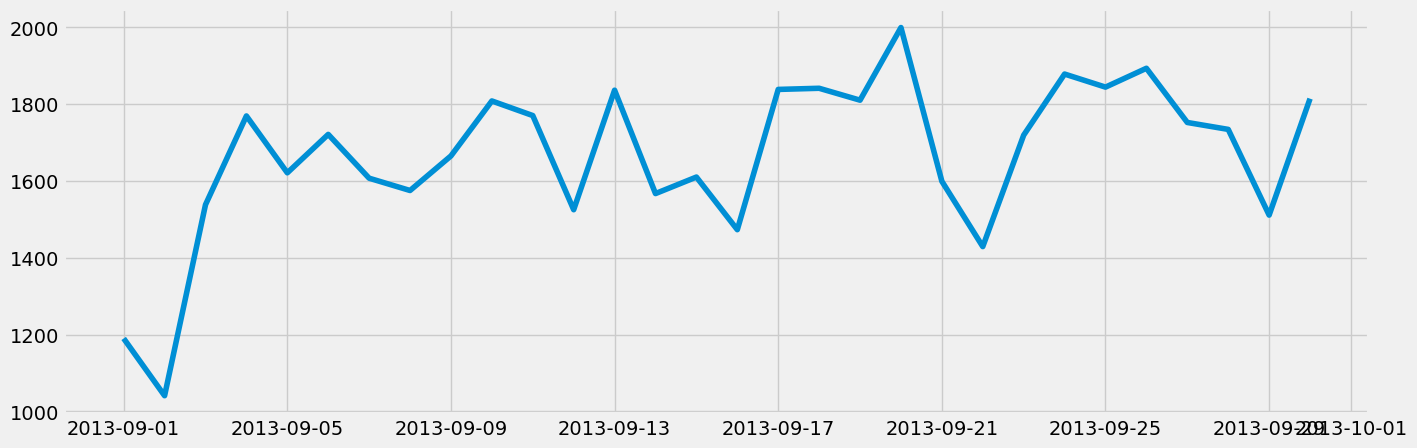

In [21]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(result)

In [22]:
# Check for missing values (you shouldn't have any)

result.isnull().sum()

ride_count    0
dtype: int64

In [23]:
# Check for duplicates

dups = result.duplicated()
dups.sum()

# No dups!

0

## 4. Time-series analysis: decomposition

In [24]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(result, model='additive')

In [25]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

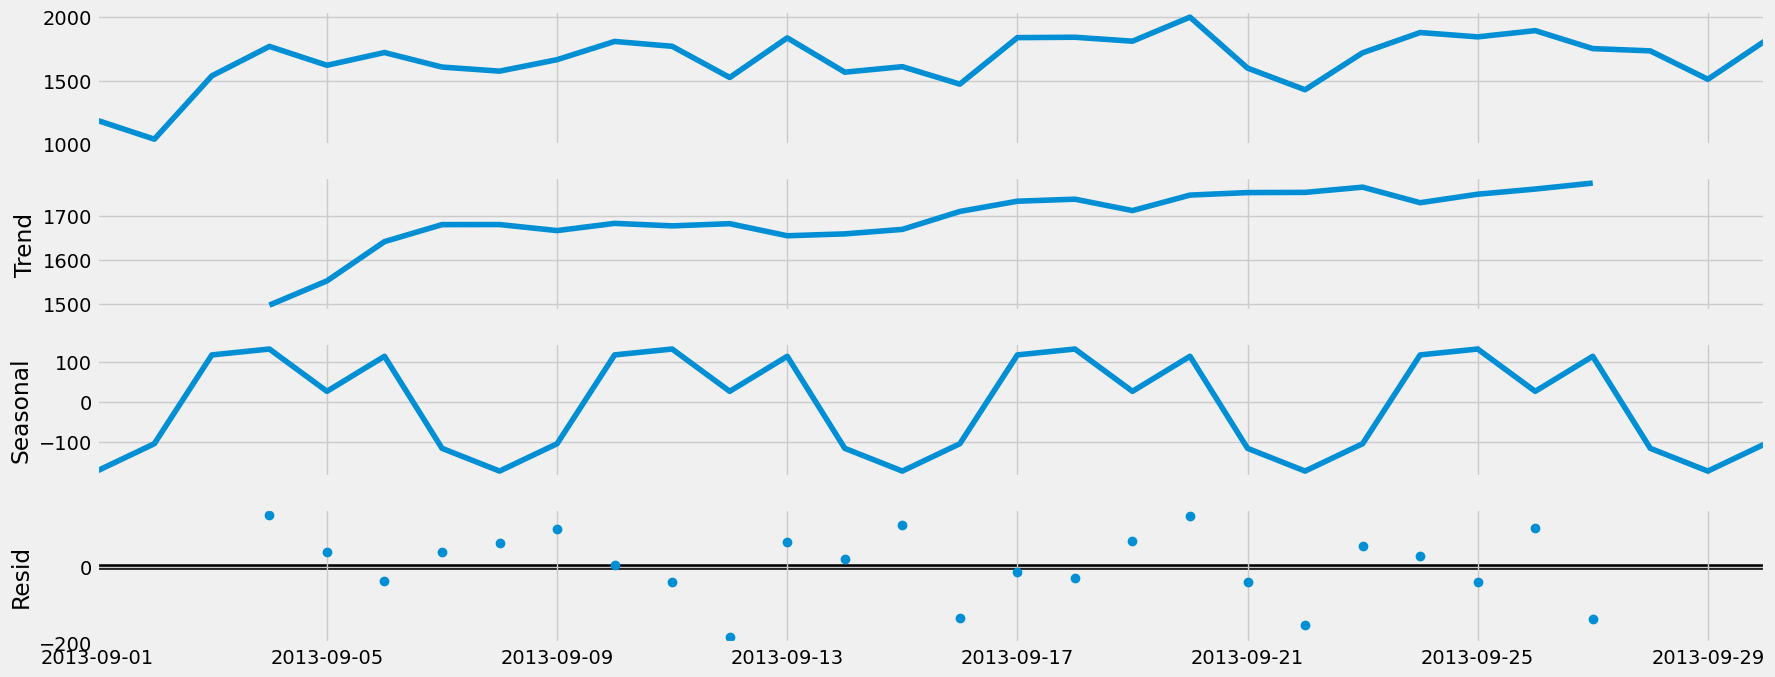

In [26]:
# Plot the separate components

decomposition.plot()
plt.show()

the level and the trend are different which tells me it needs smoothing
the trend is increasing which means there are more riders as the month goes on.
there certainly appears to have an element of of seasonality and there is a good amount of noise as well.

## 5. Testing for stationarity

In [28]:
timeseries = result 

In [29]:
timeseries

,ride_count
datetime,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1538
2013-09-04,1769
2013-09-05,1621
2013-09-06,1721
2013-09-07,1607
2013-09-08,1575
2013-09-09,1665


In [30]:
del result

In [33]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(timeseries['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.870694
p-value                         0.002261
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


With reference to the null hypothesis in the Dickey-Fuller test, the data is non-stationary.
p-value (0.002261): The p-value is less than 0.05 (commonly used significance level), which means it's statistically significant.
Test Statistic (-3.870694): The test statistic is more negative than the critical values at the  5%, and 10% significance levels.
Conclusion: With a p-value of 0.002261 (less than 0.05) and a test statistic of -3.870694 (more negative than the critical values), we can reject the null hypothesis of non-stationarity.
Interpretation: The data appears to be stationary. This suggests that there are no significant trends or seasonality patterns in the time series, and it satisfies the stationarity assumption often required for time series analysis. it doesnt look like I need to perform differencing.

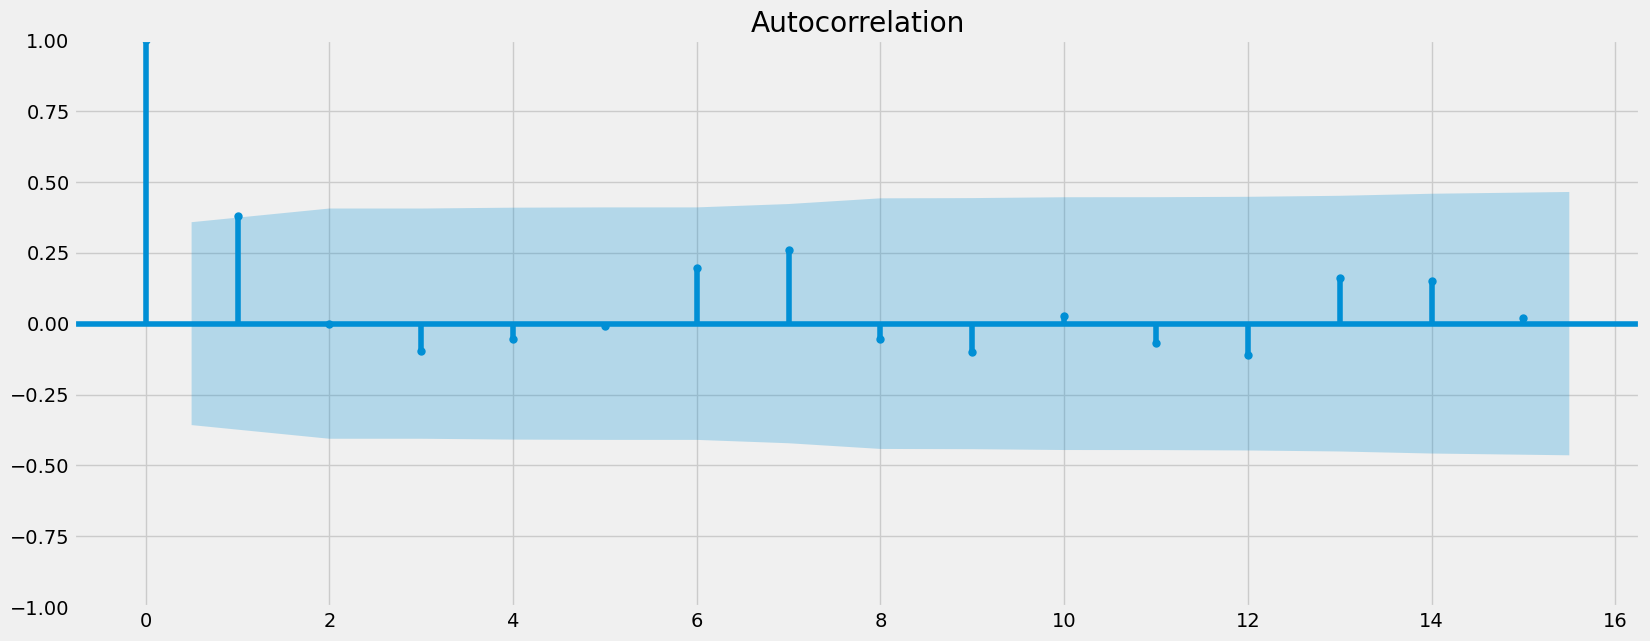

In [34]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(timeseries)
plt.show()

In [35]:
# saving to csv
df.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_final.csv'))